## Dependencies

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import psycopg2

## Connecting with pgAdmin

In [2]:
# Connect to Database 
conn = psycopg2.connect("dbname=EmployeeSQL user=postgres password=xxxxx host=localhost")
cur = conn.cursor()

In [3]:
# Query Salaries Table
salaries = pd.read_sql('SELECT * FROM "Salaries"', conn)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


## Histogram to visualize the most common salary ranges for employees.

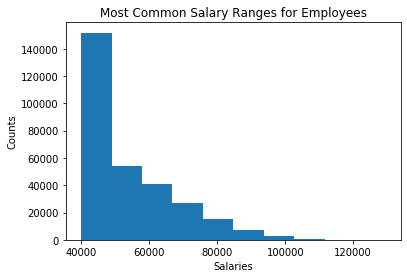

In [4]:
plt.hist(salaries['salary'])
plt.title('Most Common Salary Ranges for Employees')
plt.xlabel('Salaries')
plt.ylabel('Counts')
plt.show()

## Bar chart of average salary by title.

In [5]:
# Query Titles Table
titles = pd.read_sql('SELECT * FROM "Titles"', conn)
titles

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [6]:
# Query Employee Table
employee = pd.read_sql('SELECT * FROM "Employees"', conn)
employee.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [7]:
# Merging employee with salaries
employees_df = pd.merge(salaries, employee, on="emp_no", how="inner")
employees_df.head()

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,65828,s0001,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,78228,s0001,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [8]:
titles = titles.rename(columns={"title_id":"emp_title_id"})
titles

,emp_title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer
5,e0004,Technique Leader
6,m0001,Manager


In [9]:
# Merging titles to the df
employees_df = pd.merge(employees_df, titles, on="emp_title_id", how="inner")
employees_df.head()

,emp_no,salary,emp_title_id,birth_date,first_name,last_name,sex,hire_date,title
0,10001,60117,e0003,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer
1,10003,40006,e0003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer
2,10004,40054,e0003,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer
3,10006,40000,e0003,1953-04-20,Anneke,Preusig,F,1989-06-02,Senior Engineer
4,10009,60929,e0003,1952-04-19,Sumant,Peac,F,1985-02-18,Senior Engineer


In [10]:
# Grouping by title
titles_df = employees_df.groupby("title").mean()
titles_df

,emp_no,salary
title,,
Assistant Engineer,252992.595373,48564.434447
Engineer,253654.345919,48535.336511
Manager,110780.833333,51531.041667
Senior Engineer,253038.749885,48506.799871
Senior Staff,254481.798969,58550.172704
Staff,253408.503604,58465.382850
Technique Leader,251811.432730,48582.896092


In [11]:
# Dropping employee number column & index reset
titles_df = titles_df.drop(columns = "emp_no")
titles_df = titles_df.reset_index()
titles_df

,title,salary
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


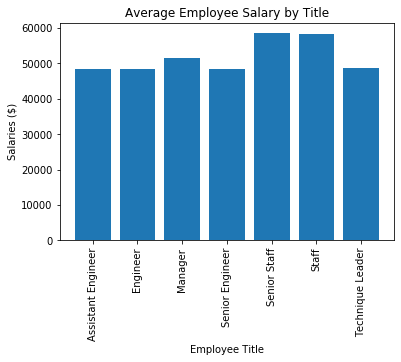

In [12]:
# Bar Plot
x_axis = titles_df["title"]
ticks = np.arange(len(x_axis))
y_axis = titles_df["salary"]
 
plt.bar(x_axis, y_axis)
plt.xticks(ticks, x_axis, rotation="vertical")

plt.ylabel("Salaries ($)")
plt.xlabel("Employee Title")
plt.title("Average Employee Salary by Title")

plt.show()

## Epilogue

Evidence in hand, you march into your boss's office and present the visualization. With a sly grin, your boss thanks you for your work. On your way out of the office, you hear the words, "Search your ID number." You look down at your badge to see that your employee ID number is 499942.

In [13]:
personal_id = pd.read_sql('Select * From "Employees" Where emp_no=499942', conn)
personal_id

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10
